In [962]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import time

import numpy as np
from numpy import zeros, newaxis
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , SimpleRNN , LSTM , Dropout

t_0 = time.time()
data = pd.read_csv (r'train.csv',nrows=1000000)   #,nrows=
t_1 = time.time()
print(f'Time : {t_1-t_0}')

Time : 85.07414746284485


In [963]:
training_data = data[data['investment_id']<200]
test_data = data[(data['investment_id']>=200) & (data['investment_id']<=250)]

training_data = training_data.drop(['row_id' , 'time_id' , 'investment_id' , 'target'], axis=1)
test_data = test_data.drop(['row_id' , 'time_id' , 'investment_id' , 'target'], axis=1)
training_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [964]:
x_train = []
y_train = []

In [965]:
for j in range(training_data.shape[0]):
    for i in range(299,training_data.shape[1]):
        x_train.append(training_data.loc[j][i-299:i])
        y_train.append(training_data.loc[j][i])

In [966]:
x_train , y_train = np.array(x_train) , np.array(y_train)
x_train = x_train[:, newaxis, :]

In [967]:
x_train.shape , y_train.shape , type(x_train) , type(y_train)

((52017, 1, 299), (52017,), numpy.ndarray, numpy.ndarray)

In [968]:
model = Sequential()

model.add(SimpleRNN(units = 1, input_shape=(x_train.shape[1:]), activation='tanh'))

model.add(Dense(8 , activation = 'tanh'))

model.add(Dense(1))

model.compile(loss = 'mean_squared_error', optimizer = 'Adam')




In [969]:
model.summary()

Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_64 (SimpleRNN)    (None, 1)                 301       
_________________________________________________________________
dense_150 (Dense)            (None, 8)                 16        
_________________________________________________________________
dense_151 (Dense)            (None, 1)                 9         
Total params: 326
Trainable params: 326
Non-trainable params: 0
_________________________________________________________________


In [970]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [971]:
t_0 = time.time()
model.fit(x_train, y_train, epochs=10, batch_size=32)
t_1 = time.time()
print(f'Time : {t_1-t_0}')

Epoch 1/10
1626/1626 [==============================] - 2s 1ms/step - loss: 0.4473
Epoch 2/10
1626/1626 [==============================] - 2s 1ms/step - loss: 0.2873
Epoch 3/10
1626/1626 [==============================] - 2s 1ms/step - loss: 0.2520
Epoch 4/10
1626/1626 [==============================] - 2s 1ms/step - loss: 0.2377
Epoch 5/10
1626/1626 [==============================] - 2s 1ms/step - loss: 0.2305
Epoch 6/10
1626/1626 [==============================] - 2s 1ms/step - loss: 0.2305
Epoch 7/10
1626/1626 [==============================] - 2s 1ms/step - loss: 0.2291
Epoch 8/10
1626/1626 [==============================] - 2s 1ms/step - loss: 0.2296
Epoch 9/10
1626/1626 [==============================] - 2s 1ms/step - loss: 0.2303
Epoch 10/10
1626/1626 [==============================] - 2s 1ms/step - loss: 0.2260
Time : 20.154067516326904


In [972]:
x_test = []
y_test = []

In [973]:
for j in range(test_data.shape[0]):
    for i in range(299,test_data.shape[1]):
        x_test.append(test_data.loc[j][i-299:i])
        y_test.append(test_data.loc[j][i])

In [974]:
x_test , y_test = np.array(x_test) , np.array(y_test)
x_test = x_test[:, newaxis, :]

In [975]:
x_test.shape , y_test.shape , type(x_test) , type(y_test)

((12855, 1, 299), (12855,), numpy.ndarray, numpy.ndarray)

In [976]:
y_pred = model.predict(x_test)


In [977]:
def graph(list):
    graph = []
    for i in range(len(list)):
        if i == 0:
            graph.append(list[0])
        else:
            graph.append(graph[-1]+list[i])
    return(graph)

In [978]:
y_pred = list(y_pred)
y_test = list(y_test)

In [979]:
y_test_graph = graph(y_test)
y_pred_graph = graph(y_pred)


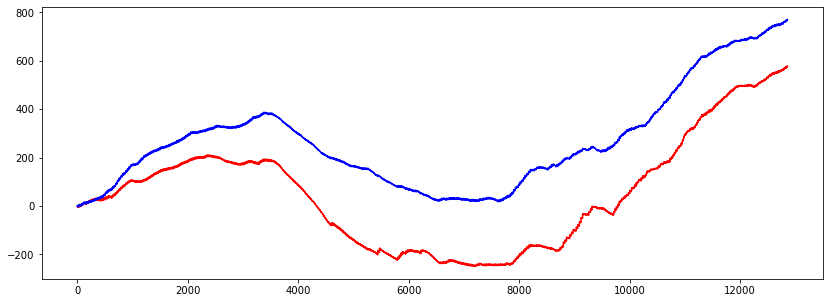

In [980]:
plt.figure(figsize=(14,5))
plt.plot(y_test_graph,color='red')
plt.plot(y_pred_graph,color='blue')
plt.show()

In [981]:
error = []
for i in range(len(y_pred)):
    err = abs(y_pred[i]-y_test[i])
    error.append(err)
f_error = sum(error)/len(y_pred)
print(f_error)

[0.30705538]
